# i. introduction

Problem Statement: Employee productivity can be affected by many factors, such as the number of meetings per week, the number of tasks completed per day, overtime hours, work-life balance, and job satisfaction levels. However, not all companies have an effective way to measure and improve employee productivity.<br><br>

Objective: To assist HR and company management in grouping employees based on their productivity levels (Low, Medium, High), so that strategic decisions can be made to improve work efficiency.
<br><br>

# ii. Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import pickle
import warnings
warnings.filterwarnings('ignore')


# iii. Data Loading

In [ ]:
# load data
url = "https://raw.githubusercontent.com/wahyughifari/Corporate-Work-Hours-Productivity/refs/heads/main/corporate_work_hours_productivity.csv"

data = pd.read_csv(url)


df = data.copy()
df


,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
0,1,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2
1,2,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13
2,3,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16
3,4,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1
4,5,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,54,Sales,Entry,18,133,No,14,10,8,Good,3,87.36,182341,16
9996,9997,37,Sales,Mid,27,187,No,5,15,3,Good,5,51.76,152109,9
9997,9998,56,Finance,Senior,20,125,No,9,4,12,Average,6,62.42,93176,18
9998,9999,57,IT,Senior,13,123,No,7,7,5,Average,1,95.47,168995,18


In [ ]:
# Melihat 20 baris pertama
df.head(20)

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
0,1,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2
1,2,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13
2,3,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16
3,4,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1
4,5,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5
5,6,41,Sales,Mid,17,155,Yes,9,16,14,Average,2,96.30,107305,4
6,7,50,Marketing,Entry,6,124,Hybrid,13,14,5,Good,6,78.70,88026,13
7,8,40,Finance,Manager,29,170,No,6,8,12,Average,4,83.78,135854,10
8,9,32,Marketing,Entry,29,167,No,11,4,3,Excellent,9,71.47,46962,16
9,10,54,IT,Mid,28,146,Yes,2,11,13,Poor,6,95.04,71160,14


In [ ]:
# Melihat 20 baris terakhir
df.tail(20)

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
9980,9981,24,Operations,Senior,8,179,Yes,6,18,1,Good,8,60.82,106954,15
9981,9982,31,HR,Entry,25,130,No,9,11,7,Poor,1,73.08,48625,15
9982,9983,39,HR,Manager,20,126,Yes,12,6,12,Average,6,64.92,183528,10
9983,9984,31,Finance,Mid,5,149,Hybrid,7,14,5,Poor,7,93.58,143872,5
9984,9985,57,Marketing,Entry,7,165,Hybrid,5,5,1,Good,7,75.81,171215,5
9985,9986,49,IT,Senior,29,124,No,3,5,5,Good,7,84.88,176246,0
9986,9987,24,HR,Mid,10,185,Yes,12,18,5,Average,2,54.29,152309,6
9987,9988,41,Sales,Mid,16,164,Yes,12,5,14,Good,4,65.79,124387,12
9988,9989,39,IT,Senior,5,120,No,6,7,7,Average,1,84.24,82611,9
9989,9990,58,Marketing,Entry,20,138,Yes,8,19,10,Average,8,64.02,42281,2


In [ ]:
# Info pada kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_ID              10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Department               10000 non-null  object 
 3   Job_Level                10000 non-null  object 
 4   Years_at_Company         10000 non-null  int64  
 5   Monthly_Hours_Worked     10000 non-null  int64  
 6   Remote_Work              10000 non-null  object 
 7   Meetings_per_Week        10000 non-null  int64  
 8   Tasks_Completed_Per_Day  10000 non-null  int64  
 9   Overtime_Hours_Per_Week  10000 non-null  int64  
 10  Work_Life_Balance        10000 non-null  object 
 11  Job_Satisfaction         10000 non-null  int64  
 12  Productivity_Score       10000 non-null  float64
 13  Annual_Salary            10000 non-null  int64  
 14  Absences_Per_Year      

In [ ]:
# Melijat unique tiap kolom
for col in df.select_dtypes(include=["int64","float64"]).columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print(f"Jumlah Unique: ",df[col].nunique())
    print("-" * 50)
    print("-" * 50)

Unique values in 'Employee_ID':
[    1     2     3 ...  9998  9999 10000]
Jumlah Unique:  10000
--------------------------------------------------
--------------------------------------------------
Unique values in 'Age':
[45 38 53 46 28 41 50 40 32 54 36 52 34 27 49 43 37 47 44 22 29 24 26 33
 35 51 57 42 23 58 48 25 39 59 31 30 55 56]
Jumlah Unique:  38
--------------------------------------------------
--------------------------------------------------
Unique values in 'Years_at_Company':
[29  7  8  4  5 17  6 28  1  3 10 13 19 14 23 11 26 18 15 25 22 12 27 16
 20 21  9 24  2]
Jumlah Unique:  29
--------------------------------------------------
--------------------------------------------------
Unique values in 'Monthly_Hours_Worked':
[198 157 146 200 193 155 124 170 167 178 173 147 187 190 127 134 148 192
 139 184 126 153 129 189 144 195 160 197 130 131 202 161 211 172 164 218
 142 179 199 140 159 120 135 152 208 141 186 194 162 171 182 215 212 205
 174 133 203 188 175 176 185 210

In [ ]:
# Melihat unique kolom-kolom kategorikal
for col in df.select_dtypes(include="object").columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print(f"Jumlah Unique: ",df[col].nunique())
    print("-" * 50)

Unique values in 'Department':
['Marketing' 'Sales' 'Finance' 'IT' 'Operations' 'HR']
Jumlah Unique:  6
--------------------------------------------------
Unique values in 'Job_Level':
['Mid' 'Manager' 'Entry' 'Senior']
Jumlah Unique:  4
--------------------------------------------------
Unique values in 'Remote_Work':
['No' 'Yes' 'Hybrid']
Jumlah Unique:  3
--------------------------------------------------
Unique values in 'Work_Life_Balance':
['Good' 'Excellent' 'Poor' 'Average']
Jumlah Unique:  4
--------------------------------------------------


In [ ]:
# Melihat unique value kolom numerik
for col in df.columns:
    print(f"Column '{col}' : {df[col].nunique()} unique values:")
    print(df[col].unique())  # Menampilkan max 10 unique values untuk efisiensi
    print("-" * 50)

Column 'Employee_ID' : 10000 unique values:
[    1     2     3 ...  9998  9999 10000]
--------------------------------------------------
Column 'Age' : 38 unique values:
[45 38 53 46 28 41 50 40 32 54 36 52 34 27 49 43 37 47 44 22 29 24 26 33
 35 51 57 42 23 58 48 25 39 59 31 30 55 56]
--------------------------------------------------
Column 'Department' : 6 unique values:
['Marketing' 'Sales' 'Finance' 'IT' 'Operations' 'HR']
--------------------------------------------------
Column 'Job_Level' : 4 unique values:
['Mid' 'Manager' 'Entry' 'Senior']
--------------------------------------------------
Column 'Years_at_Company' : 29 unique values:
[29  7  8  4  5 17  6 28  1  3 10 13 19 14 23 11 26 18 15 25 22 12 27 16
 20 21  9 24  2]
--------------------------------------------------
Column 'Monthly_Hours_Worked' : 100 unique values:
[198 157 146 200 193 155 124 170 167 178 173 147 187 190 127 134 148 192
 139 184 126 153 129 189 144 195 160 197 130 131 202 161 211 172 164 218
 142 179 

In [ ]:
# Missing value
df.isnull().sum()

,0
Employee_ID,0
Age,0
Department,0
Job_Level,0
Years_at_Company,0
Monthly_Hours_Worked,0
Remote_Work,0
Meetings_per_Week,0
Tasks_Completed_Per_Day,0
Overtime_Hours_Per_Week,0


The columns in this dataset show no missing values.

In [ ]:
# DUplicate
df.duplicated().sum()

0

Pada dataset ini menujukkan tidak adanya duplicate value

# iv. Exploratory Data Analysis (EDA)

## Relationship between Job Level and Work-Life Balance

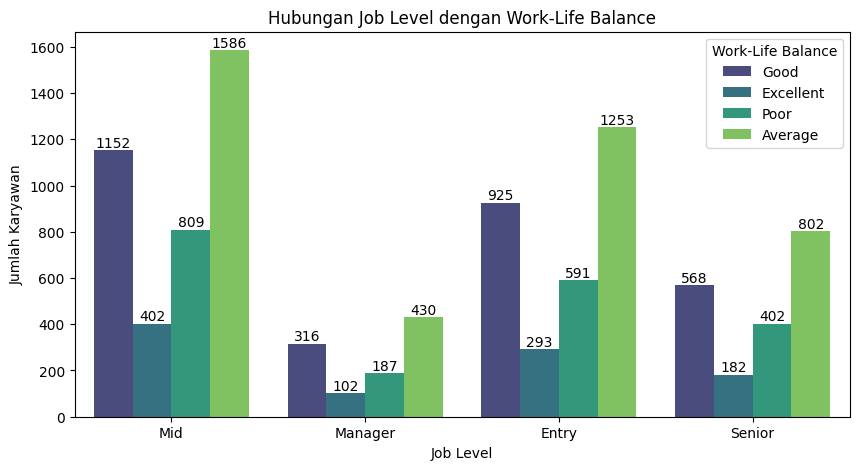

In [ ]:
# Bar chart
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Job_Level", hue="Work_Life_Balance", data=df, palette="viridis")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title("Hubungan Job Level dengan Work-Life Balance")
plt.xlabel("Job Level")
plt.ylabel("Jumlah Karyawan")
plt.legend(title="Work-Life Balance")
plt.show()

The chart above shows that jobs with high positions do not necessarily have a high work-life balance. While jobs with lower positions do not necessarily have a low work-life balance. It can be seen at the manager level, having a little work-life balance compared to other positions while in the entry level category, it can be seen that only a few employees have a poor work-life balance compared to a good, excellent and average work-life balance.

## Numerical Feature Correlation

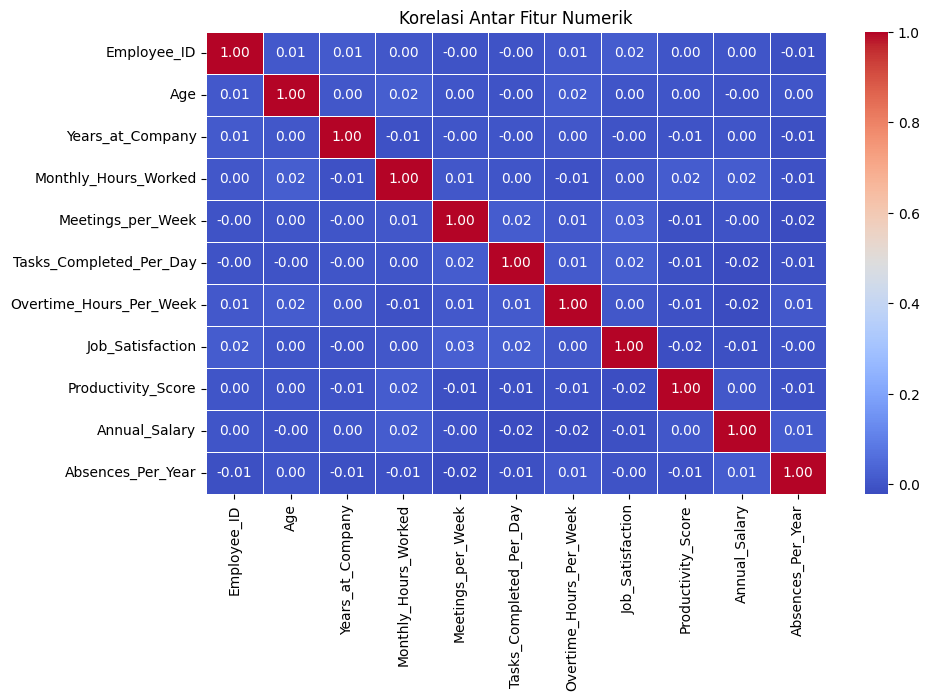

In [ ]:
# Heatmap
plt.figure(figsize=(10,6))
ax = sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Korelasi Antar Fitur Numerik")
plt.show()

The above columns show that the columns do not have a high enough correlation. The range of the above columns is from -0.2 to 0.2. The following numbers are low enough to show correlation with each other.

# v. Feature Engineering

In [ ]:
# Drop kolom yang tidak berkontribusi pada prediksi
df.drop(columns=["Employee_ID"], inplace=True)

In [ ]:
# 20 baris pertama
df.head(20)

,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
0,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2
1,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13
2,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16
3,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1
4,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5
5,41,Sales,Mid,17,155,Yes,9,16,14,Average,2,96.30,107305,4
6,50,Marketing,Entry,6,124,Hybrid,13,14,5,Good,6,78.70,88026,13
7,40,Finance,Manager,29,170,No,6,8,12,Average,4,83.78,135854,10
8,32,Marketing,Entry,29,167,No,11,4,3,Excellent,9,71.47,46962,16
9,54,IT,Mid,28,146,Yes,2,11,13,Poor,6,95.04,71160,14


In [ ]:
# Membuat Kategori Produktivitas (Low, Medium, High)

def categorize_productivity(score):
    if score < 65:
        return "Low"
    elif score < 85:
        return "Medium"
    else:
        return "High"

In [ ]:
# Drop Kolom asli

df["Productivity_Category"] = df["Productivity_Score"].apply(categorize_productivity)
df.drop(columns=["Productivity_Score"], inplace=True)

In [ ]:
# 20 baris pertama
df.head(20)

,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Annual_Salary,Absences_Per_Year,Productivity_Category
0,45,Marketing,Mid,29,198,No,1,7,1,Good,5,182971,2,High
1,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74217,13,Medium
2,53,Sales,Mid,8,146,No,2,15,11,Poor,4,176003,16,Medium
3,46,Finance,Mid,4,200,No,4,9,0,Poor,5,69209,1,High
4,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,195477,5,High
5,41,Sales,Mid,17,155,Yes,9,16,14,Average,2,107305,4,High
6,50,Marketing,Entry,6,124,Hybrid,13,14,5,Good,6,88026,13,Medium
7,40,Finance,Manager,29,170,No,6,8,12,Average,4,135854,10,Medium
8,32,Marketing,Entry,29,167,No,11,4,3,Excellent,9,46962,16,Medium
9,54,IT,Mid,28,146,Yes,2,11,13,Poor,6,71160,14,High


In [ ]:
# Value counts kolom Productivity_Category
df['Productivity_Category'].value_counts()

,count
Productivity_Category,
Medium,3979
High,3121
Low,2900


In [ ]:
# Info kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      10000 non-null  int64 
 1   Department               10000 non-null  object
 2   Job_Level                10000 non-null  object
 3   Years_at_Company         10000 non-null  int64 
 4   Monthly_Hours_Worked     10000 non-null  int64 
 5   Remote_Work              10000 non-null  object
 6   Meetings_per_Week        10000 non-null  int64 
 7   Tasks_Completed_Per_Day  10000 non-null  int64 
 8   Overtime_Hours_Per_Week  10000 non-null  int64 
 9   Work_Life_Balance        10000 non-null  object
 10  Job_Satisfaction         10000 non-null  int64 
 11  Annual_Salary            10000 non-null  int64 
 12  Absences_Per_Year        10000 non-null  int64 
 13  Productivity_Category    10000 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.

## Endoding Kolom Target

In [ ]:
# Definisikan urutan ordinal
category_order = [['Low', 'Medium', 'High']]

# Inisialisasi OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=category_order)
df["Productivity_Category"] = ordinal_encoder.fit_transform(df[["Productivity_Category"]]).astype(int)
print(df["Productivity_Category"].value_counts())


Productivity_Category
1    3979
2    3121
0    2900
Name: count, dtype: int64


In [ ]:
# value count kolom yang sudah di-encoded
df['Productivity_Category'].value_counts()

,count
Productivity_Category,
1,3979
2,3121
0,2900


## Split X dan y

In [ ]:
# Split X dan y
X = df.drop(columns=["Productivity_Category"])
y = df["Productivity_Category"]
y


,Productivity_Category
0,2
1,1
2,1
3,2
4,2
...,...
9995,2
9996,0
9997,0
9998,2


In [ ]:
# Data X
X

,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Annual_Salary,Absences_Per_Year
0,45,Marketing,Mid,29,198,No,1,7,1,Good,5,182971,2
1,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74217,13
2,53,Sales,Mid,8,146,No,2,15,11,Poor,4,176003,16
3,46,Finance,Mid,4,200,No,4,9,0,Poor,5,69209,1
4,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,195477,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,54,Sales,Entry,18,133,No,14,10,8,Good,3,182341,16
9996,37,Sales,Mid,27,187,No,5,15,3,Good,5,152109,9
9997,56,Finance,Senior,20,125,No,9,4,12,Average,6,93176,18
9998,57,IT,Senior,13,123,No,7,7,5,Average,1,168995,18


In [ ]:
# Kolom-kolom pada data X
X.columns

Index(['Age', 'Department', 'Job_Level', 'Years_at_Company',
       'Monthly_Hours_Worked', 'Remote_Work', 'Meetings_per_Week',
       'Tasks_Completed_Per_Day', 'Overtime_Hours_Per_Week',
       'Work_Life_Balance', 'Job_Satisfaction', 'Annual_Salary',
       'Absences_Per_Year'],
      dtype='object')

In [ ]:
# Memisahkan kolom numerik dan kategorik
cat_cols = ["Department", "Job_Level", "Remote_Work", "Work_Life_Balance"]
num_cols =  ["Age", "Years_at_Company", "Monthly_Hours_Worked", "Meetings_per_Week",
            "Tasks_Completed_Per_Day", "Overtime_Hours_Per_Week", "Annual_Salary", "Absences_Per_Year"]

## Cardinality

In [ ]:
# Melihat Cardinality
for i in cat_cols:
    print(f'Jumlah unique value dari kolom {i} : {X[i].nunique()}')
    print(f'Unique value dari kolom {i} : {X[i].unique()}')
    print('')

Jumlah unique value dari kolom Department : 6
Unique value dari kolom Department : ['Marketing' 'Sales' 'Finance' 'IT' 'Operations' 'HR']

Jumlah unique value dari kolom Job_Level : 4
Unique value dari kolom Job_Level : ['Mid' 'Manager' 'Entry' 'Senior']

Jumlah unique value dari kolom Remote_Work : 3
Unique value dari kolom Remote_Work : ['No' 'Yes' 'Hybrid']

Jumlah unique value dari kolom Work_Life_Balance : 4
Unique value dari kolom Work_Life_Balance : ['Good' 'Excellent' 'Poor' 'Average']



No columns have high cardinality.

## Split Train dan Test

In [ ]:
# Split Train dan Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (8000, 13)
Test Size:  (2000, 13)


In [ ]:
# 20 baris pertama X_train
X_train.head(20)

,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Annual_Salary,Absences_Per_Year
4318,32,Finance,Mid,17,181,Yes,10,15,10,Good,3,186172,16
471,58,Sales,Mid,23,123,Yes,10,19,1,Average,1,96048,4
9656,50,Sales,Mid,1,146,Hybrid,13,17,1,Average,8,120458,16
8243,53,Sales,Mid,1,184,Yes,13,11,3,Good,9,182714,0
9984,57,Marketing,Entry,7,165,Hybrid,5,5,1,Good,7,171215,5
3612,54,IT,Senior,18,141,Hybrid,2,14,0,Poor,7,52167,16
3046,40,HR,Mid,28,202,Hybrid,10,8,12,Average,8,75673,11
3617,58,Operations,Manager,24,157,Yes,14,13,5,Excellent,3,72073,1
9312,24,Marketing,Mid,11,202,Hybrid,10,15,8,Excellent,6,101390,15
3114,28,Operations,Senior,2,129,No,1,16,3,Average,2,198207,6


In [ ]:
# 20 baris pertama X_test
X_test.head(20)

,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Annual_Salary,Absences_Per_Year
293,34,Finance,Mid,20,188,Hybrid,8,15,5,Excellent,8,59663,12
1244,37,Operations,Senior,26,201,Yes,12,9,9,Good,8,83990,7
7353,42,Finance,Entry,15,169,Yes,2,16,2,Good,7,100406,7
5145,26,Finance,Mid,26,192,Hybrid,6,7,11,Good,6,153594,17
1618,50,Sales,Entry,2,182,No,10,17,6,Poor,4,167898,13
3825,29,Finance,Mid,26,134,Yes,1,9,12,Excellent,6,183017,3
6012,53,Marketing,Entry,10,120,No,9,9,2,Average,9,195227,10
4943,35,IT,Manager,17,125,No,9,9,1,Poor,8,39595,13
8623,30,Finance,Manager,22,138,No,3,6,14,Poor,5,121333,5
6187,37,HR,Senior,10,131,Hybrid,0,18,5,Good,9,144258,16


## Missing Value

In [ ]:
# cek missing value
print(X_train.isnull().sum())
print('')
print(X_test.isnull().sum())
print('')
print('missing value di y_train :', y_train.isnull().sum())
print('')
print('missing value di y_test :',y_test.isnull().sum())

Age                        0
Department                 0
Job_Level                  0
Years_at_Company           0
Monthly_Hours_Worked       0
Remote_Work                0
Meetings_per_Week          0
Tasks_Completed_Per_Day    0
Overtime_Hours_Per_Week    0
Work_Life_Balance          0
Job_Satisfaction           0
Annual_Salary              0
Absences_Per_Year          0
dtype: int64

Age                        0
Department                 0
Job_Level                  0
Years_at_Company           0
Monthly_Hours_Worked       0
Remote_Work                0
Meetings_per_Week          0
Tasks_Completed_Per_Day    0
Overtime_Hours_Per_Week    0
Work_Life_Balance          0
Job_Satisfaction           0
Annual_Salary              0
Absences_Per_Year          0
dtype: int64

missing value di y_train : 0

missing value di y_test : 0


There are no missing values ​​in the train or test data

## Outlier

In [ ]:
# Fungsi cek skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

In [ ]:
# melihat skewness
skewness_results = check_skewness(X_train, "Age", "Years_at_Company", "Monthly_Hours_Worked", "Meetings_per_Week",
            "Tasks_Completed_Per_Day", "Overtime_Hours_Per_Week", "Annual_Salary", "Absences_Per_Year")

for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

Age: -0.03171571188165319
Years_at_Company: 0.02030134876914902
Monthly_Hours_Worked: -0.012340805046131397
Meetings_per_Week: 0.00400956826780677
Tasks_Completed_Per_Day: 0.005464057048604857
Overtime_Hours_Per_Week: -0.0058750927051720615
Annual_Salary: 0.005670907560260093
Absences_Per_Year: -0.002269684076032692


There are no columns that have skewness 0, so there are no columns that need to be dropped.

In [ ]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5:
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: ['Age', 'Years_at_Company', 'Monthly_Hours_Worked', 'Meetings_per_Week', 'Tasks_Completed_Per_Day', 'Overtime_Hours_Per_Week', 'Annual_Salary', 'Absences_Per_Year']
Skewed: []
Extreme Skewed: []


Columns that have the skewness above are still considered normal skewness.

## Feature Selection

In [ ]:
# Memisahkan kolom untuk Encoding (OHE, OrdinalEncoder, dan Feature Scalling)
categorical_cols_ord = ["Job_Level",  "Work_Life_Balance",]
categorical_cols_ohe = ["Remote_Work", "Department"]
numerical_cols = ["Age", "Years_at_Company", "Monthly_Hours_Worked", "Meetings_per_Week",
                  "Tasks_Completed_Per_Day", "Overtime_Hours_Per_Week", "Annual_Salary", "Absences_Per_Year"]

In [ ]:
# Definisikan urutan encoding untuk fitur ordinal
ordinal_mapping = [
    ["Entry", "Mid", "Senior", "Manager"],  # Job Level
    ["Poor", "Average", "Good", "Excellent"]  # Work Life Balance
]

# Pipeline preprocessing
preprocessor = ColumnTransformer([
    ("ordinal", OrdinalEncoder(categories=ordinal_mapping), categorical_cols_ord),
    ("onehot", OneHotEncoder(drop="first"), categorical_cols_ohe),
    ("scaler", StandardScaler(), numerical_cols),],
                            remainder='passthrough')

# Transform data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# vi. Model Definition

In [ ]:
# Inisialisasi model dengan parameter default
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# List model untuk training
models = {"KNN": knn, "SVM": svm, "Decision Tree": dt, "Random Forest": rf, "Gradient Boosting": gb}

In multi-class cases like this, Gradient Boosting is more suitable to use.

# vii. Model Training

In [ ]:
# Train semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} telah selesai dilatih.")

KNN telah selesai dilatih.
SVM telah selesai dilatih.
Decision Tree telah selesai dilatih.
Random Forest telah selesai dilatih.
Gradient Boosting telah selesai dilatih.


# viii. Model Evaluation

In [ ]:
# looping model evaluation sebelum cross validation
for name, model in models.items():
    print(f" Evaluasi {name} Sebelum Cross Validation:")

    y_pred = model.predict(X_test)  # Prediksi di test set
    print(classification_report(y_test, y_pred))
    print("="*80)

 Evaluasi KNN Sebelum Cross Validation:
              precision    recall  f1-score   support

           0       0.31      0.40      0.35       593
           1       0.42      0.45      0.43       797
           2       0.32      0.20      0.25       610

    accuracy                           0.36      2000
   macro avg       0.35      0.35      0.34      2000
weighted avg       0.36      0.36      0.35      2000

 Evaluasi SVM Sebelum Cross Validation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       593
           1       0.40      1.00      0.57       797
           2       1.00      0.00      0.01       610

    accuracy                           0.40      2000
   macro avg       0.47      0.33      0.19      2000
weighted avg       0.46      0.40      0.23      2000

 Evaluasi Decision Tree Sebelum Cross Validation:
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       593

Overall, the evaluation results of all models before cross validation, the average F1-score (macro avg F1-score) shows that each model has a low value. <br><br>

KKN:<br>
The best F1-score in class 1 (0.43), while classes 0 (0.35) and 2 (0.25) have lower scores while the macro avg is (0.34). This model is quite balanced in capturing all classes but still has an imbalance in class 2.<br><br>

SVM:<br>
The highest F1-score for class 1 (0.57), but classes 0 and 2 are very bad (0.00 and 0.01) while the macro avg F1-score is only 0.19, indicating that this model only works well for one class. This model completely ignores classes 0 and 2, leading to extreme imbalance.<br><br>

Decision Tree: F1-score is quite balanced between classes, with values ​​of 0.28, 0.36, and 0.31 while the macro avg is (0.31). <br><br>

Random Forest:<br>
The best F1-score is in class 1 (0.49), followed by class 0 (0.22) and class 2 (0.20) while the macro avg is (0.31).<br><br>

Gradient Boosting:<br>
The best F1-score is in class 1 (0.51), while class 0 (0.07) and class 2 (0.20) are very low while the macro avg is (0.26).

In [ ]:
# Looping model evaluation setelah cross validation

for name, model in models.items():
    print(f" Evaluasi {name} Setelah Cross Validation:")

    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)  # Prediksi dengan Cross Validation
    print(classification_report(y_train, y_pred_cv))
    print("="*80)


 Evaluasi KNN Setelah Cross Validation:
              precision    recall  f1-score   support

           0       0.29      0.36      0.32      2307
           1       0.40      0.46      0.43      3182
           2       0.31      0.18      0.22      2511

    accuracy                           0.34      8000
   macro avg       0.33      0.33      0.32      8000
weighted avg       0.34      0.34      0.33      8000

 Evaluasi SVM Setelah Cross Validation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2307
           1       0.40      1.00      0.57      3182
           2       0.56      0.00      0.01      2511

    accuracy                           0.40      8000
   macro avg       0.32      0.33      0.19      8000
weighted avg       0.33      0.40      0.23      8000

 Evaluasi Decision Tree Setelah Cross Validation:
              precision    recall  f1-score   support

           0       0.28      0.27      0.28      2307

Evaluation results after cross validation.<br><br>

KNN: <br>
The best F1-score in class 1 (0.43), followed by class 0 (0.32), while class 2 has the lowest score (0.22). Its macro avg F1-score (0.32), slightly decreased compared to before cross validation (0.34). Overall accuracy is 34%, slightly decreased from before. Evaluation results in class 2 decreased after cross validation.<br><br>

SVM: <br>
The best F1-score in class 1 (0.57), but classes 0 and 2 are still bad (0.00 and 0.01). Its macro avg F1-score is 0.19, the same as before and overall accuracy remains 40%. Overall there is almost no improvement and still very biased towards class 1.<br><br>

Decision Tree: <br>
F1-score is quite balanced between classes with values ​​of 0.28, 0.40, and 0.31. Macro avg F1-score (0.33), slightly better than before cross validation (0.31) and overall accuracy remains at 34%. Overall, slightly better than before cross validation.<br><br>

Random Forest: <br>
Best F1-score in class 1 (0.49), but class 0 (0.19) and class 2 (0.23) are still low. Macro avg F1-score (0.30), slightly decreased compared to the previous (0.31) and the overall accuracy is still stable at 36%.<br><br>

Gradient Boosting: <br>
The best F1-score in class 1 (0.53), while class 0 (0.12) and class 2 (0.19) are still low. Macro avg F1-score (0.28), slightly better than the previous (0.26) and the overall accuracy increased to 37%.<br><br>

The best model to be used Hyperparameter: Random Forest.<br>
The results of the random forest F1-score are quite good with fairly stable accuracy.

## Hyperparameter

In [ ]:
# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Definisi parameter untuk tuning
param_dist = {
    "n_estimators": np.arange(50, 500, 50),  # Coba jumlah pohon dari 50 sampai 450
    "max_depth": np.arange(3, 20, 2),        # Coba kedalaman pohon dari 3 sampai 19
    "min_samples_split": [2, 5, 10],         # Minimum sampel untuk split
    "min_samples_leaf": [1, 2, 4]            # Minimum sampel di leaf node
}

# Randomized Search dengan Cross Validation (5-Fold)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,          # Jumlah kombinasi yang diuji
    cv=5,               # 5-Fold Cross Validation
    scoring='f1_weighted',  # Gunakan f1-score tertimbang sebagai metrik evaluasi
    n_jobs=-1,          # Gunakan semua core CPU
    verbose=2,          # Menampilkan progres tuning
    random_state=42     # Untuk hasil yang dapat direproduksi
)

# Jalankan Randomized Search
random_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 19}
Best Score: 0.3240821483287131


In [ ]:
# Gunakan model dengan parameter terbaik
best_rf = random_search.best_estimator_

# Prediksi pada data uji
y_pred = best_rf.predict(X_test)

# Tampilkan Classification Report
print("Classification Report Setelah Hyperparameter Tuning:")
print(classification_report(y_test, y_pred))

Classification Report Setelah Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.30      0.16      0.21       593
           1       0.38      0.58      0.46       797
           2       0.27      0.21      0.23       610

    accuracy                           0.34      2000
   macro avg       0.32      0.31      0.30      2000
weighted avg       0.32      0.34      0.32      2000



Results after hyperparameter: <br><br>

The accuracy after tuning is 34%, not significantly improved compared to before tuning (36%). While the average macro avg F1-score (0.30), which is the same as before tuning. Class 1 has the best performance with F1-score (0.46) better than other classes but decreased from before tuning. Meanwhile, classes 0 and 2 have F1-score values ​​of 0.21 and 0.23, where there is an increase in class 0 and the same value in class 2 compared to before tuning.<br><br>

Conclusion:<br>
The model after tuning is still less than optimal, especially in capturing classes 0 and 2. While class 1 is more easily recognized by the model, possibly because it has more samples.<br><br>

Suggestions:<br>
* Try to do data balancing
* Change parameters such as n_estimators to higher values ​​(100 - 200) to increase prediction stability.

# ix. Model Saving

In [ ]:
# Simpan preprocessing pipeline dan model terbaik
with open("preprocessor.pkl", "wb") as file:
    pickle.dump(preprocessor, file)

with open("best_model.pkl", "wb") as file:
    pickle.dump(random_search.best_estimator_, file)

print("Model dan Preprocessor berhasil disimpan!")

Model dan Preprocessor berhasil disimpan!


# x. Model Inference

Performed on ***Job_Performance_Prediction_inf.ipynb***

# xi. Conclusion

Model Conclusion: <br>

* Gradient Boosting is used because this dataset uses multi-class classification.
* Overall, the evaluation results of all models before cross validation, the average F1-score (macro avg F1-score) shows that each model has a low value.
* The evaluation results after cross validation show that the best model to be used for Hyperparameter is Random Forest. This is because the F1-score results of random forest are quite good with fairly stable accuracy compared to other models.
* The results after hyperparameter show that the model after tuning is still less than optimal, especially in capturing classes 0 and 2. While class 1 is easier to recognize by the model, possibly because it has more samples.

The accuracy after tuning is 34%, not significantly increasing compared to before tuning (36%). While the average macro avg F1-score (0.30), which is the same as before tuning. Class 1 has the best performance with an F1-score (0.46) better than other classes but decreased compared to before tuning. Meanwhile, classes 0 and 2 have F1-score values ​​of 0.21 and 0.23, where there is an increase in class 0 and the same value in class 2 compared to before tuning.<br>

Suggestion:<br>
* Try to balance the data
* Change parameters such as n_estimators to higher values ​​(100 - 200) to increase prediction stability.<br><br>

Business Conclusion:<br>
The results of the inference model show that of the 3 predicted employees, the first employee (index 0) is predicted to be in class 0 (group with low productivity) while the second and third employees (index 1 and 2) are predicted to be in class 2 (group with high productivity).<br><br>
Insight: <br>
* Employees with poor work-life balance and high workload tend to be in class 0, which could indicate job dissatisfaction or a higher risk of turnover.

* Employees with higher salaries, better work-life balance, and more regular workloads are more likely to be in class 2, which may indicate higher job satisfaction and better employee retention.
* The remote work factor does not directly determine the class, because there is a difference between the second and third individuals who are both in class 2, but with different working conditions (remote and hybrid). <br>
Suggestions: <br>
* Focus on class 0 employees to improve retention. <br>
Improve work-life balance by reducing overtime or providing work flexibility.
* Optimize the productivity of class 2 employees <br>
Employees who are in class 2 seem to have better working conditions. Make sure they stay engaged by providing appropriate work challenges. And evaluate whether there are certain factors (such as salary or hybrid work policies) that drive higher job satisfaction.
* Evaluate the effectiveness of remote work <br>
IT employees with remote work can still be in class 2. This shows that remote work policies can be effective if implemented correctly. Therefore, management can consider work flexibility for other possible positions.